<a href="https://colab.research.google.com/github/Annie1710/shark-attack-assignment/blob/main/Module_5_Shark_attack_assigment_inleveren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voorbereiding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext google.colab.data_table

In [3]:
df_uncleaned = pd.read_csv('/content/drive/MyDrive/attacks.csv', encoding='cp1252')
#df_uncleaned.columns

In [4]:
# onnodige kolommen verwijderen
df=df_uncleaned.drop(columns=['Case Number', 'Date', 'Year', 'Country', 'Area', 'Location',
       'Name', 'Sex ', 'Time',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'])
# df

In [5]:
df1 = df.dropna(how='all') # alle compleet lege rijen verwijderen

In [6]:
df1 = df1.rename(columns={'Species ': 'Species', 'Sex ': 'Sex', 'Fatal (Y/N)': 'Fatal'}) # namen corrigeren. 

In [7]:
def replace_value(df, column_name, missing_old, missing_new): # functie om de oude, foutieve waarden te vervangen door nieuwe
  df[column_name] = df[column_name].replace({missing_old: missing_new})

# vraag 1 What are the most dangerous types of sharks to humans?

In [8]:
species_df = df1
species_df.columns

Index(['Type', 'Activity', 'Age', 'Injury', 'Fatal', 'Species'], dtype='object')

In [9]:
df2=df1.drop(columns=['Type', 'Activity', 'Age', 'Injury'])

In [10]:
df2['Species'] = df2['Species'].str.lower()

In [11]:
df2['Fatal'] = df2['Fatal'].str.lower()

In [12]:
replace_value(df2, 'Fatal', ' n', 'n')

In [13]:
replace_value(df2, 'Fatal', 'n ', 'n')

In [14]:
replace_value(df2, 'Fatal', 'm', 'n')

In [15]:
replace_value(df2, 'Fatal', '2017', np.NaN)

In [16]:
replace_value(df2, 'Fatal', 'unknown', np.NaN)

# Groeperen

In [17]:
df2['Type_group'] = 0

In [18]:
df2['Type_group'][df2['Species'].fillna('').str.contains("unknown")] = 'unknown'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df2['Type_group'][df2['Species'].fillna('').str.contains("white")] = 'white shark'

In [20]:
df2['Type_group'][df2['Species'].fillna('').str.contains("grey")] = 'grey shark'

In [21]:
df2['Type_group'][df2['Species'].fillna('').str.contains("tiger")] = 'tiger shark'

In [22]:
df2['Type_group'][df2['Species'].fillna('').str.contains("bull")] = 'bull shark'

In [23]:
df2['Type_group'][df2['Species'].fillna('').str.contains("blue")] = 'blue-nose shark'

In [24]:
df2['Type_group'][df2['Species'].fillna('').str.contains("hammerhead")] = 'hammerhead shark'

In [25]:
df2['Type_group'][df2['Species'].fillna('').str.contains("nurse")] = 'nurse shark'

In [26]:
df2['Type_group'][df2['Species'].fillna('').str.contains("lemon")] = 'lemon shark'

In [27]:
df2['Type_group'][df2['Species'].fillna('').str.contains("whaler")] = 'whaler shark'

In [28]:
df2['Type_group'][df2['Species'].fillna('').str.contains("raggedtooth")] = 'raggedtooth shark'

In [29]:
df2['Type_group'][df2['Species'].fillna('').str.contains("shovelnose")] = 'shovelnose shark'

In [30]:
df2['Type_group'][df2['Species'].fillna('').str.contains("mako")] = 'mako shark'

In [31]:
df2['Type_group'][df2['Species'].fillna('').str.contains("black")] = 'black-tipped shark'

In [32]:
df2['Type_group'][df2['Species'].fillna('').str.contains("black")] = 'black-tipped shark'

In [33]:
df2['Type_group'][df2['Species'].fillna('').str.contains("not confirmed")] = 'unknown'

In [34]:
df2['Type_group'][~df2['Species'].fillna('').str.contains("shark")] = 'unknown'

# Verder

In [ ]:
df2.Type_group.value_counts()

Text(0.5, 1.0, 'Five most dangerous type of shark')

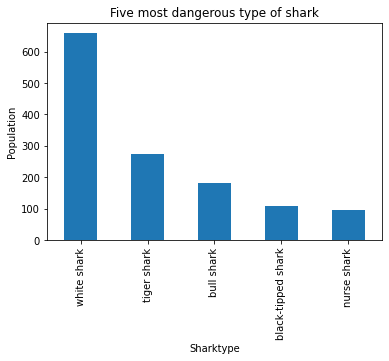

In [38]:
df2.Type_group.value_counts()[2:7].plot(kind='bar')

plt.xlabel('Sharktype')
plt.ylabel('Population')
plt.title('Five most dangerous type of shark')

In [ ]:
fatal = pd.crosstab(index=df2['Type_group'], columns=df2["Fatal"])

In [ ]:
fatal['ratio'] = fatal['y']/fatal['n']

In [40]:
fatal2 = fatal.sort_values('ratio')

In [41]:
df2=df1.drop(columns=['Type', 'Activity', 'Age', 'Injury'])

In [ ]:
fatal3=fatal2.drop(columns=['y', 'n'])

Text(0.5, 1.0, 'Three most deadly type of shark')

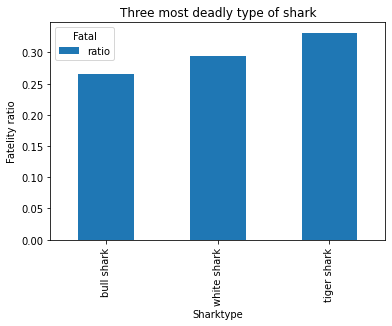

In [43]:
fatal3[-4:-1].plot(kind='bar')

plt.xlabel('Sharktype')
plt.ylabel('Fatelity ratio')
plt.title('Three most deadly type of shark')

Conclusie: de witte haai is het vaakst betrokken bij een aanval. Echter is de kans op een fatale afloop het grootst bij een aanval van een tijgerhaai.

# vraag 2 Are children more likely to be attacked by sharks?

In [8]:
age_df = df1.Age

In [9]:
def extract_ages(age):
    try:
        age = int(age)
        return int(age)
    except ValueError:
        if age == '2 to 3 months':
            return 0
        if age == '18 months':
            return 1  
        elif age == "teen":
            return 13
        elif age == "young":
            return 16
        elif age == '20s':
            return 25
        elif age == '30s':
            return 35
        elif age == 'mid-30s':
            return 35
        elif age == '36 & 26':
            return 30 
        elif age == '50s':
            return 55   
        elif age == 'middle-age':
            return 55
        elif age == 'elderly':
            return 80  
        else: 
          return np.nan        
    return int(age)

In [10]:
age_df = age_df.apply(extract_ages)

In [11]:
age_df1 = age_df.dropna(how='all')  # alle NaN verwijderen

In [12]:
def child_or_adult(age_df1):
  if age_df1 < 18:
    return "child"
  else:
    return "adult"

In [13]:
age_df1.apply(child_or_adult)  # definieren of slachtoffer kind of volwassene is

0       adult
1       child
2       adult
6       adult
7       adult
        ...  
6242    child
6243    child
6254    adult
6276    child
6301    child
Name: Age, Length: 3396, dtype: object

Text(0.5, 1.0, 'Adult or Child')

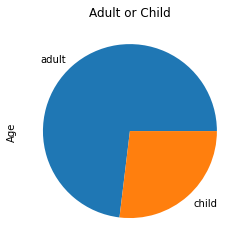

In [14]:
age_df1.apply(child_or_adult).value_counts().plot(kind='pie')
plt.title('Adult or Child')

# vraag 3 are shark attacks where sharks were provoked more or less dangerous?

In [ ]:
provoked_df = df1

In [ ]:
df2=provoked_df.drop(columns=['Age', 'Activity', 'Injury', 'Species'])

In [20]:
df2.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

Assumption: boating, boat and Provoked are provoking actions, others are not. Invalid, uestionable and sea disaster are not relevant. Boatomg is type error, should be boating

In [25]:
replace_value(df2, 'Type', 'Boating', 'Provoked')
replace_value(df2, 'Type', 'Invalid', 'Unknown')
replace_value(df2, 'Type', 'Questionable', 'Unknown')
replace_value(df2, 'Type', 'Sea Disaster', 'Unknown')
replace_value(df2, 'Type', 'Boat', 'Provoked')
replace_value(df2, 'Type', 'Boatomg', 'Provoked')

In [ ]:
df2.Type.value_counts() 

Unknown       3476
Unprovoked    2183
Provoked       643
Name: Type, dtype: int64

In [26]:
df2.Fatal.unique() 

array(['N', 'Y', None], dtype=object)

In [27]:
replace_value(df2, 'Fatal', np.nan, None)
replace_value(df2, 'Fatal', 'M', 'N')
replace_value(df2, 'Fatal', 'UNKNOWN', None)
replace_value(df2, 'Fatal', '2017', None)
replace_value(df2, 'Fatal', ' N', 'N')
replace_value(df2, 'Fatal', 'N ', 'N')
replace_value(df2, 'Fatal', 'y', 'Y')


In [28]:
df2.Fatal.unique() 

array(['N', 'Y', None], dtype=object)

In [29]:
df2.Fatal.value_counts() 

N    4302
Y    1389
Name: Fatal, dtype: int64

In [30]:
fatal = pd.crosstab(index=df2["Type"], columns=df2["Fatal"])
fatal

Fatal,N,Y
Type,,
Provoked,868,30
Unknown,82,176
Unprovoked,3351,1181


Van de provoked aanvallen zijn er 30 fataal en 868 niet dat is dus 3,45% Van dee uprovoked aanvallen zijn er 1181 vam de 3351 fataal, dus 35,2%. 
De aanvallen waar haaien werden uitgelokt zijn dus minder dodelijk dan wanneer dat niet het geval was. 


# Vraag 4: Are certain activities more likely to result in a shark attack?

In [80]:
df4 = df1
# df4

In [81]:
df4.columns

Index(['Type', 'Activity', 'Age', 'Injury', 'Fatal', 'Species'], dtype='object')

In [82]:
activities_df=df4.drop(columns=['Type', 'Age', 'Injury', 'Fatal', 'Species'])
# activities_df

In [83]:
activities_df.dropna()

,Activity
0,Paddling
1,Standing
2,Surfing
3,Surfing
4,Free diving
...,...
6296,Swimming
6297,Diving
6298,Pearl diving
6299,Swimming


In [84]:
activities_df.Activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [85]:
activities_df = activities_df.dropna()
# activities_df

,Activity
0,Paddling
1,Standing
2,Surfing
3,Surfing
4,Free diving
...,...
6296,Swimming
6297,Diving
6298,Pearl diving
6299,Swimming


In [86]:
activities_df['Activity'] = df['Activity'].str.lower()

In [87]:
activities_df['Activity_group'] = 0

Aannames: 
bathing, playing and floating are considered swimming,
snorkeling is considerd diving,
boarding is considered surfing,
supping, rowing and canoeing are considered paddling,
wading is considered walking

# Groeperen


In [88]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('swim')] = 'swimming'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('bath')] = 'swimming'

In [90]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('play')] = 'swimming'

In [91]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('float')] = 'swimming'

In [92]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('diving')] = 'diving'

In [93]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('snorkel')] = 'diving'

In [94]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('fish')] = 'fishing'

In [95]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('board')] = 'surfing'

In [96]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('surf')] = 'surfing'

In [97]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('padd')] = 'paddling'

In [98]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('sup')] = 'paddling'

In [99]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('row')] = 'paddling'

In [100]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('canoe')] = 'paddling'

In [101]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('walk')] = 'walking'

In [102]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('wading')] = 'walking'

In [103]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('standing')] = 'walking'

In [104]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('feeding')] = 'feeding'

In [105]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('kayak')] = 'paddling'

In [106]:
activities_df['Activity_group'][activities_df['Activity'].fillna('').str.contains('shark')] = 'direct_interaction'

# verder

In [107]:
activities_df.Activity_group.value_counts()

surfing               1472
swimming              1305
fishing               1060
diving                 578
0                      562
walking                349
direct_interaction     240
paddling               187
feeding                  5
Name: Activity_group, dtype: int64

Text(0.5, 1.0, 'Activities to result in shark attack')

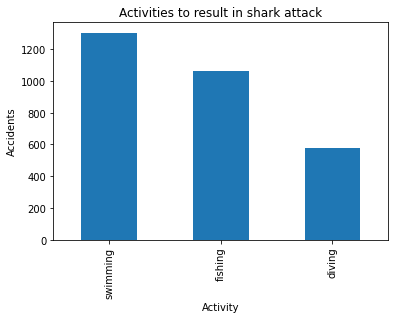

In [108]:
activities_df.Activity_group.value_counts()[1:4].plot(kind='bar')

plt.xlabel('Activity')
plt.ylabel('Accidents')
plt.title('Activities to result in shark attack')

Conclusie: zwemmen wordt het vaakst gezien als aanleiding voor een shark attack. 